In [233]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read Files

In [234]:
oversampled_data_2001 = pd.read_csv('oversampled_data_2001_AllVariables.csv')
oversampled_data_2009 = pd.read_csv('oversampled_data_2009_AllVariables.csv')
oversampled_data_2017 = pd.read_csv('oversampled_data_2017_AllVariables.csv')

In [235]:
school_2009 = oversampled_data_2009.copy()
school_2017 = oversampled_data_2017.copy()

In [236]:
oversampled_data_2009.columns

Index(['HOUSEID', 'PERSONID', 'DRIVER', 'HHFAMINC', 'TRIPPURP', 'R_AGE',
       'URBRUR', 'WHYFROM', 'WHYTO', 'WHYTRP1S', 'WRKCOUNT', 'CNTTDTR',
       'DELIVER', 'DISTTOSC', 'GCDWORK', 'GRADE', 'NBIKETRP', 'NWALKTRP',
       'PURCHASE', 'SCHTRN1', 'SCHTRN2', 'TIMETOSC', 'TIMETOWK', 'WEBUSE',
       'WKFMHMXX', 'WRKTRANS', 'DISTTOWK', 'HHSIZE', 'HHFAMINC2'],
      dtype='object')

In [237]:
oversampled_data_2017.columns

Index(['HOUSEID', 'PERSONID', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTO',
       'HHFAMINC', 'WRKCOUNT', 'URBRUR', 'R_AGE', 'DRIVER', 'WRKTRANS',
       'NWALKTRP', 'NBIKETRP', 'CARSHARE', 'TIMETOWK', 'WKFMHMXX', 'SCHTRN1',
       'SCHTRN2', 'DELIVER', 'CNTTDTR', 'GCDWORK', 'DISTTOWK', 'DISTTOSC',
       'BIKE', 'CAR', 'BUS', 'TRAIN', 'WEBUSE', 'HHSIZE', 'WEBUSE.1',
       'HHFAMINC2'],
      dtype='object')

# Column Mapping

In [238]:
# Mapping for SCHTRN2 column
schtrn1_mapping_2009 = {0: 'Skip', 1: 'Car', 2: 'SchoolBus', 3: 'Other', 4: 'PickupTruck', 5: 'Van', 
                        6: 'SUV', 7: 'Walk', 8: 'Bicycle', 9: 'Trolley', 10: 'ShuttleBus', 11: 'Motorcycle', 
                        12: 'LocalBus', 13: 'DontKnow', 14: 'CommuterBus', 15: 'CharterBus'}

schtrn1_mapping_2017 = {0: 'Skip', 1: 'Car', 2: 'SUV', 3: 'NotAscertained', 4: 'CommuterBus', 5: 'Van', 
                        6: 'Motorcycle', 7: 'PickupTruck', 8: 'Bicycle', 9: 'Walk', 10: 'Other', 
                        11: 'AmtrackTrain', 12: 'Airplane', 13: 'TaxiCab', 14: 'DontKnow'}


oversampled_data_2009['SCHTRN2'] = oversampled_data_2009['SCHTRN2'].map(schtrn1_mapping_2009)
oversampled_data_2017['SCHTRN2'] = oversampled_data_2017['SCHTRN2'].map(schtrn1_mapping_2017)

In [239]:
filter_values_2009 = ['Skip', 'DontKnow']
oversampled_data_2009_filtered = oversampled_data_2009[~oversampled_data_2009['SCHTRN2'].isin(filter_values_2009)]

filter_values_2017 = ['Skip', 'NotAscertained', 'DontKnow']
oversampled_data_2017_filtered = oversampled_data_2017[~oversampled_data_2017['SCHTRN2'].isin(filter_values_2017)]

# Circular Plot

### a) For 2009: use this section, and comment out section b) and c)

Note that there is no information about school trips in 2001

In [240]:
school_mode = oversampled_data_2009_filtered[['SCHTRN2', 'HHFAMINC2']]

### b) For 2017: use this section, and comment out section a) and c)

Note that no one answers "school bus" in this year in FL. So, we exluded this year for the presentation

In [241]:
# school_mode = oversampled_data_2017_filtered[['SCHTRN2', 'HHFAMINC2']]

# Summarize data to be plotted

In [242]:
# Grouping by 'HHFAMINC2' and 'SCHTRN1' and counting occurrences
summary = school_mode.groupby(['HHFAMINC2', 'SCHTRN2']).size().reset_index(name='Count')
summary = summary.rename(columns={'HHFAMINC2': 'group', 'SCHTRN2': 'name', 'Count': 'value'})

In [243]:
# Group by "group" and calculate the total sum of "value" for each group
grouped_df = summary.groupby('group')['value'].sum().reset_index()

# Merge the original DataFrame with the grouped data on the "group" column
merged_df = pd.merge(summary, grouped_df, on='group', suffixes=('', '_total'))

# Calculate the percentage and create a new column "percentage"
merged_df['percentage'] = (merged_df['value'] / merged_df['value_total']) * 100

# Drop the unnecessary columns if needed
result_df = merged_df.drop(['value_total'], axis=1)

result_df[:5]

,group,name,value,percentage
0,0,Bicycle,12,0.671141
1,0,Car,592,33.109620
2,0,LocalBus,26,1.454139
3,0,Motorcycle,1,0.055928
4,0,Other,33,1.845638


In [244]:
# Filter the DataFrame for "Car" and "SchoolBus"
filtered_df = result_df[result_df['name'].isin(['Car', 'SchoolBus'])]
filtered_df

,group,name,value,percentage
1,0,Car,592,33.109620
7,0,SchoolBus,818,45.749441
12,1,Car,756,37.593237
17,1,SchoolBus,764,37.991049
22,2,Car,1516,41.982830
29,2,SchoolBus,1132,31.348657


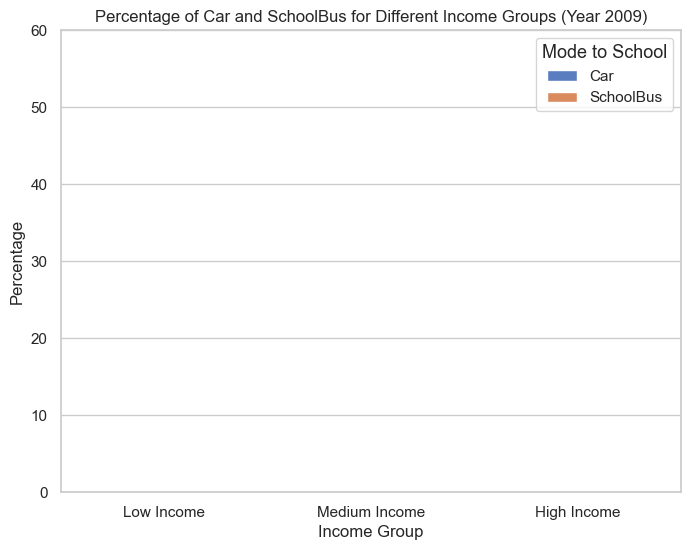

In [245]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

income_order = ['Low Income', 'Medium Income', 'High Income']

# Use the 'hue' parameter with the 'muted' palette
sns.barplot(x='group', y='percentage', hue='name', data=filtered_df, palette='muted', order=income_order)

# Add a legend with a custom title
plt.legend(title='Mode to School', title_fontsize='13')

# Label the y-values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.ylim(0, 60)

plt.title('Percentage of Car and SchoolBus for Different Income Groups (Year 2009)')
plt.xlabel('Income Group')
plt.ylabel('Percentage')
plt.show()

In [246]:
result_df = result_df.drop("value", axis=1)
result_df = result_df.rename(columns={'percentage': 'value'})

In [247]:
# Add the percentage to the "name" column
result_df['name'] = result_df.apply(lambda row: f'{row["name"]} ({row["value"]:.2f}%)', axis=1)

In [248]:
result_df[:3]

,group,name,value
0,0,Bicycle (0.67%),0.671141
1,0,Car (33.11%),33.109620
2,0,LocalBus (1.45%),1.454139


In [249]:
df = result_df

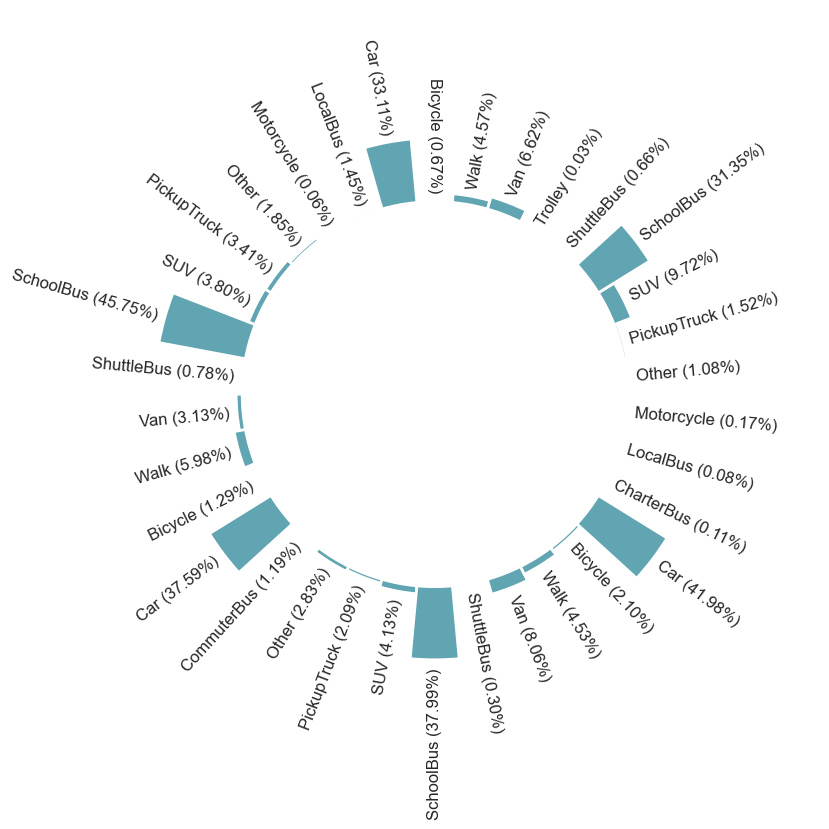

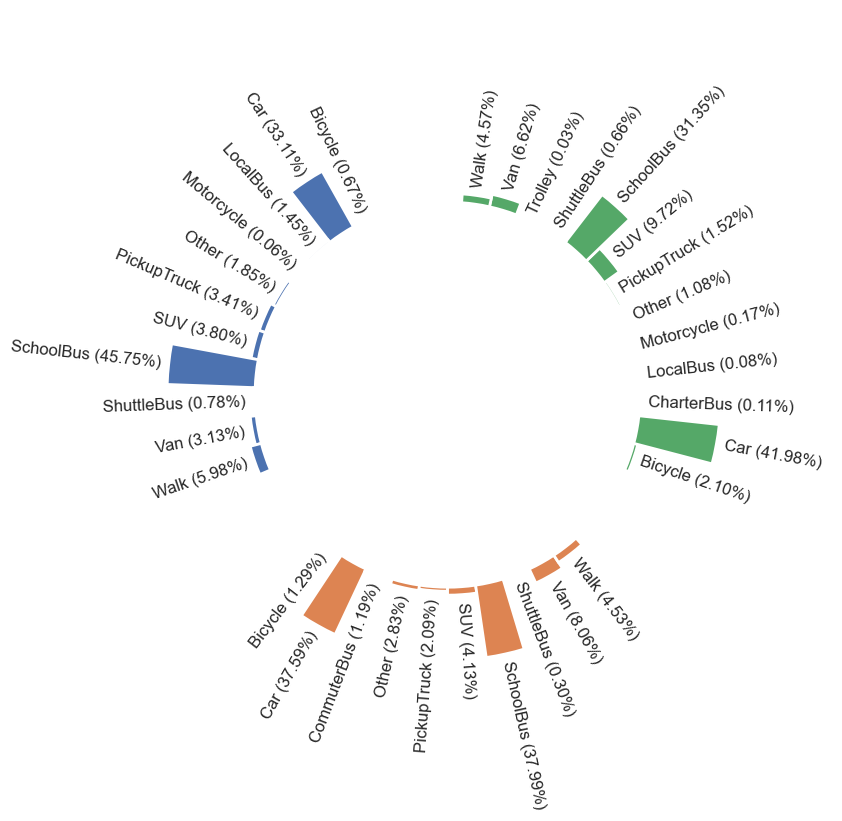

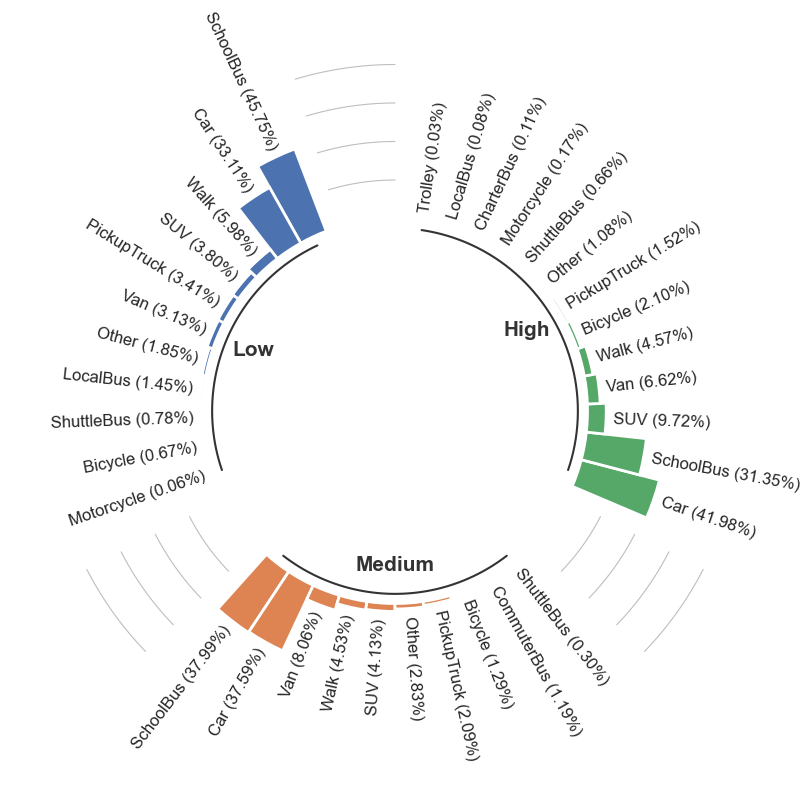

In [250]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# All this part is like the code above
VALUES = df_sorted["value"].values
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

offset = 0 
for group, size in zip(["Low", "Medium", "High"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=15, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

In [251]:
oversampled_data_2009.columns

Index(['HOUSEID', 'PERSONID', 'DRIVER', 'HHFAMINC', 'TRIPPURP', 'R_AGE',
       'URBRUR', 'WHYFROM', 'WHYTO', 'WHYTRP1S', 'WRKCOUNT', 'CNTTDTR',
       'DELIVER', 'DISTTOSC', 'GCDWORK', 'GRADE', 'NBIKETRP', 'NWALKTRP',
       'PURCHASE', 'SCHTRN1', 'SCHTRN2', 'TIMETOSC', 'TIMETOWK', 'WEBUSE',
       'WKFMHMXX', 'WRKTRANS', 'DISTTOWK', 'HHSIZE', 'HHFAMINC2'],
      dtype='object')

In [252]:
oversampled_data_2017.columns

Index(['HOUSEID', 'PERSONID', 'WHYFROM', 'TRIPPURP', 'WHYTRP1S', 'WHYTO',
       'HHFAMINC', 'WRKCOUNT', 'URBRUR', 'R_AGE', 'DRIVER', 'WRKTRANS',
       'NWALKTRP', 'NBIKETRP', 'CARSHARE', 'TIMETOWK', 'WKFMHMXX', 'SCHTRN1',
       'SCHTRN2', 'DELIVER', 'CNTTDTR', 'GCDWORK', 'DISTTOWK', 'DISTTOSC',
       'BIKE', 'CAR', 'BUS', 'TRAIN', 'WEBUSE', 'HHSIZE', 'WEBUSE.1',
       'HHFAMINC2'],
      dtype='object')

In [253]:
if "DISTTOSC" in oversampled_data_2009.columns:
    print("YES")
else:
    print("NO")

YES


In [254]:
# Function to filter outliers using IQR
def filter_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    return data_series[(data_series >= Q1 - 1.5 * IQR) & (data_series <= Q3 + 1.5 * IQR)]

In [255]:
income_labels = {0: 'Low Income', 1: 'Medium Income', 2: 'High Income'}
income_order = ['Low Income', 'Medium Income', 'High Income']

In [256]:
school_2009['DISTTOSC']

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
174253   -1
174254   -1
174255   -1
174256   -1
174257   -1
Name: DISTTOSC, Length: 174258, dtype: int64

In [257]:
# For 2009
distance_mapping = {
    1: "Less than 1/4 mile",
    2: "Between 1/4 to 1/2 mile",
    3: "1/2 mile to 1 mile",
    4: "1 mile to 2 miles",
    5: "More than 2 miles"
}

disttosc_order = ["Less than 1/4 mile", "Between 1/4 to 1/2 mile", "1/2 mile to 1 mile", "1 mile to 2 miles", "More than 2 miles"]

# Apply the mapping to the 'DISTTOSC' column and create a new column with the results
school_2009 = school_2009[school_2009['DISTTOSC'] > 0]
school_2009['DISTTOSC'] = school_2009['DISTTOSC'].map(distance_mapping)

# Apply the mapping to the 'HHFAMINC2' column and create a new column with the results
school_2009['HHFAMINC2'] = school_2009['HHFAMINC2'].map(income_labels)


In [258]:
school_2009 = school_2009[["HHFAMINC2", "DISTTOSC"]]

In [259]:
school_2009 = school_2009.groupby(['HHFAMINC2', 'DISTTOSC']).size().reset_index(name='Count')
school_2009 = school_2009.rename(columns={'HHFAMINC2': 'group', 'DISTTOSC': 'name', 'Count': 'value'})

# Group by "group" and calculate the total sum of "value" for each group
grouped_df = school_2009.groupby('group')['value'].sum().reset_index()

# Merge the original DataFrame with the grouped data on the "group" column
merged_df = pd.merge(school_2009, grouped_df, on='group', suffixes=('', '_total'))

# Calculate the percentage and create a new column "percentage"
merged_df['percentage'] = (merged_df['value'] / merged_df['value_total']) * 100

# Drop the unnecessary columns if needed
result_df = merged_df.drop(['value_total'], axis=1)

result_df[:5]

,group,name,value,percentage
0,High Income,1 mile to 2 miles,678,18.786367
1,High Income,1/2 mile to 1 mile,270,7.481297
2,High Income,Between 1/4 to 1/2 mile,87,2.410640
3,High Income,Less than 1/4 mile,142,3.934608
4,High Income,More than 2 miles,2432,67.387088


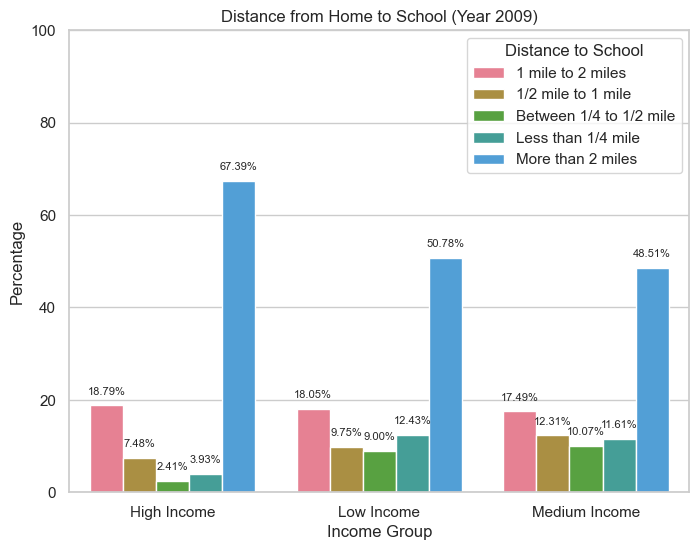

In [260]:
sns.set_palette("husl")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='group', y='percentage', hue='name', data=result_df)
plt.ylim(0, 100)

# Set plot labels and title
plt.xlabel('Income Group')
plt.ylabel('Percentage')
plt.title('Distance from Home to School (Year 2009)')

# Show legend
plt.legend(title='Distance to School', bbox_to_anchor=(1, 1))

# Annotate percentages on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Show the plot
plt.show()


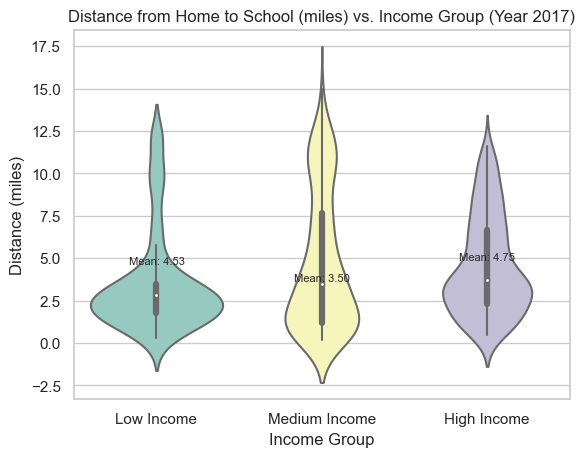

In [261]:
# For 2017
year = 2017

# Filter out distance that is less than or equal to 0
oversampled_data_year = globals()[f'school_{year}']

# Filter out values less than or equal to 0
filtered_data = oversampled_data_year[(oversampled_data_year['DISTTOSC'] > 0)].copy()

# Apply IQR method to filter out outliers
filtered_data['DISTTOSC'] = filter_outliers(filtered_data['DISTTOSC'])

# Create a new DataFrame for better readability
data = {
    'DISTTOSC': filtered_data['DISTTOSC'],
    'Income Group': filtered_data['HHFAMINC2'].map(income_labels)
}
df_plot = pd.DataFrame(data)

# Calculate means for each income group
means = df_plot.groupby('Income Group')['DISTTOSC'].mean()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a violin plot to visualize the relationship with specified order
sns.violinplot(x='Income Group', y='DISTTOSC', data=df_plot, palette="Set3", order=income_order)

# Add mean labels to the plot
for j, label in enumerate(means.index):
    plt.text(j, means[label], f'Mean: {means[label]:.2f}', ha='center', va='bottom', fontsize=8)


# Set title and labels
plt.title(f'Distance from Home to School (miles) vs. Income Group (Year {year})')
plt.xlabel('Income Group')
plt.ylabel('Distance (miles)')

# Show the plot
plt.show()